## Uso de Programación Lineal para el cálculo de la duración del proyecto y del camino crítico

In [1]:
from google.colab import drive, userdata
drive.mount('/content/gdrive/')
pmule_path = r'/content/gdrive/MyDrive/COMPARTIDOS/COMPARTIDO_AREA/DOCENCIA/Direccion_de_Proyectos/pmule/compartido_publico_alumnos/'

import sys
sys.path.insert(1, pmule_path + "src")
!source {pmule_path}venv/bin/activate
!apt install libgraphviz-dev
%pip install pygraphviz "pandas[excel]==2.2.2"
%pip install dataframe_image
%pip install -q amplpy

Mounted at /content/gdrive/
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 k

In [2]:
from pmule import *
# Alargamos el ancho de las celdas a un tanto por ciento
from IPython.display import display, HTML, Markdown, Math, Latex
display(HTML("<style>.container { width:60% !important; }</style>"))

import pandas as pd
import numpy as np
import sympy as sym
import matplotlib
import seaborn as sns

datos_enunciado = pd.DataFrame(data=np.array([
       [ 8, 4, 2],
       [10, 5, 4],
       [12, 6, 3],
       [10, 6, 4],
       [ 7, 5, 5],
       [ 7, 4, 5],
       [14, 9, 3],
       [12, 8, 2],
       [10, 7, 1],
       ]),
   columns=['Dmax', 'Dtope', 'UCR'],
   index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
   dtype=np.int32)
datos_enunciado

,Dmax,Dtope,UCR
A,8,4,2
B,10,5,4
C,12,6,3
D,10,6,4
E,7,5,5
F,7,4,5
G,14,9,3
H,12,8,2
I,10,7,1


In [3]:
proyecto = ProjectGraph.from_dict_of_strings({
    "A": "---",
    "B": "---",
    "C": "---",
    "D": "A",
    "E": "B",
    "F": "C,D,E",
    "G": "A",
    "H": "B",
    "I": "F,G",
})

## Cálculo del PERT con duraciones máximas

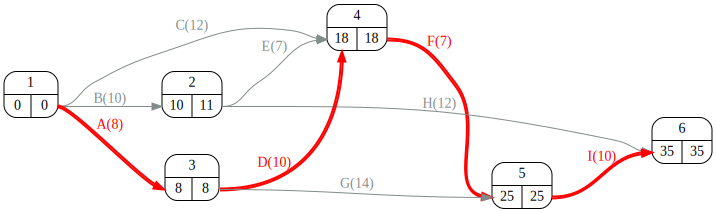

In [4]:
proyecto.pert("pert_2024-11-duraciones_maximas.svg", durations=datos_enunciado["Dmax"], ranksep=1)

## Cálculo del PERT con duraciones mínimas


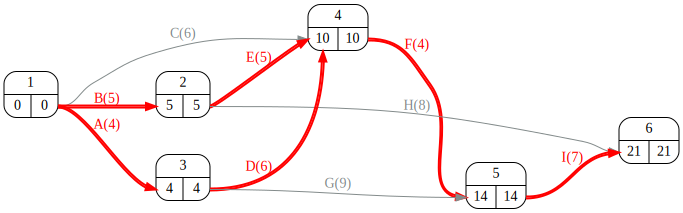

In [5]:
proyecto.pert("pert_2024-11-duraciones_minimas.svg", durations=datos_enunciado["Dtope"], ranksep=1)

# Reducción de la duración del proyecto con mínimo coste

## Project Crashing utilizando el algoritmo de Ackoff-Sassieni

In [6]:
ackoff, best_option, duration, available = proyecto.ackoff(durations=datos_enunciado['Dmax'].to_dict(),
                min_durations=datos_enunciado['Dtope'].to_dict(),
                costs=datos_enunciado['UCR'].to_dict())
ackoff

D shape (9,)
Path matrix shape (5, 9)


Step: 0,	 Best option: ['I'], 	 Cost: 1, 	 Critical paths: ['Route_4']
Step: 1,	 Best option: ['I'], 	 Cost: 1, 	 Critical paths: ['Route_4']
Step: 2,	 Best option: ['I'], 	 Cost: 1, 	 Critical paths: ['Route_4']
Step: 3,	 Best option: ['A'], 	 Cost: 2, 	 Critical paths: ['Route_4']
Step: 4,	 Best option: ['F'], 	 Cost: 5, 	 Critical paths: ['Route_2', 'Route_4']
Step: 5,	 Best option: ['F'], 	 Cost: 5, 	 Critical paths: ['Route_2', 'Route_4']
Step: 6,	 Best option: ['F'], 	 Cost: 5, 	 Critical paths: ['Route_2', 'Route_4']
Step: 7,	 Best option: ['B', 'A'], 	 Cost: 6, 	 Critical paths: ['Route_2', 'Route_4', 'Route_5']
Step: 8,	 Best option: ['B', 'A'], 	 Cost: 6, 	 Critical paths: ['Route_2', 'Route_4', 'Route_5']
Step: 9,	 Best option: ['B', 'A'], 	 Cost: 6, 	 Critical paths: ['Route_2', 'Route_4', 'Route_5']
Step: 10,	 Best option: ['B', 'G', 'D'], 	 Cost: 11, 	 Critical paths: ['Route_2', 'Route_4', 'Route_5']
Step: 11,	 Best option: ['B', '

,A,B,C,D,E,F,G,H,I,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Route_1,,,3.0,,,5.0,,,1.0,29.0,28.0,27.0,26.0,26.0,25.0,24.0,23.0,23.0,23.0,23.0,23.0,23.0,22.0,21.0
Route_2,,4.0,,,5.0,5.0,,,1.0,34.0,33.0,32.0,31.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0,24.0,23.0,22.0,21.0
Route_3,,4.0,,,,,,2.0,,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,21.0,20.0,19.0,18.0,17.0,17.0,17.0
Route_4,2.0,,,4.0,,5.0,,,1.0,35.0,34.0,33.0,32.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0,24.0,23.0,22.0,21.0
Route_5,2.0,,,,,,3.0,,1.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,24.0,23.0,22.0,21.0
0,4.0,5.0,6.0,4.0,2.0,3.0,5.0,4.0,3.0,,,,,,,,,,,,,,,
1,4.0,5.0,6.0,4.0,2.0,3.0,5.0,4.0,2.0,,,,,,,,,,,,,,,
2,4.0,5.0,6.0,4.0,2.0,3.0,5.0,4.0,1.0,,,,,,,,,,,,,,,
3,4.0,5.0,6.0,4.0,2.0,3.0,5.0,4.0,0.0,,,,,,,,,,,,,,,
4,3.0,5.0,6.0,4.0,2.0,3.0,5.0,4.0,0.0,,,,,,,,,,,,,,,


## Project Crashing utilizando Programación Lineal

$$\min z= \mathrm{c}^T \left( \mathrm{T} - \mathrm{d} \right)  $$
sujeto a:
\begin{eqnarray}
0 & = & y_A  \\
0 & = & y_B \\
0 & = &  y_C  \\
0 & \le & y_A + d_A  & \le  & y_D \\
0 & \le & y_B + d_B  & \le  & y_E \\
0 & \le & y_C + d_C  & \le  & y_F  \\
0 & \le & y_D + d_D  & \le  & y_F  \\
0 & \le & y_E + d_E  & \le  & y_F  \\
0 & \le & y_A + d_A  & \le  & y_G  \\
0 & \le & y_B + d_B  & \le  & y_H  \\
0 & \le & y_F + d_F  & \le  & y_I  \\
0 & \le & y_G + d_G  & \le  & y_I  \\
0 & \le & y_H + d_H  & \le  & y_{Project} \\
0 & \le & y_I + d_I  & \le  & y_{Project}\\
t_i  & \le  & d_i & \le & T_i \\
0    & \le  & t_i \\
\end{eqnarray}


Representación del problema de programación lineal usando AMPL:

In [7]:
from amplpy import AMPL, ampl_notebook
ampl = ampl_notebook(
    modules=["highs"], # pick from over 20 modules including most commercial and open-source solvers
    license_uuid="default")
#    license_uuid=userdata.get("licencia_ampl")) # Should a license be required
SOLVER = "highs"

Using default Community Edition License for Colab. Get yours at: https://ampl.com/ce
Licensed to AMPL Community Edition License for the AMPL Model Colaboratory (https://ampl.com/colab).


In [8]:
%%ampl_eval

# Definición del modelo
set ACTIVITIES;

param T {ACTIVITIES} >= 0; # Normal duration
param t {ACTIVITIES} >= 0; # Crash duration
param c {ACTIVITIES};      # Unitary cost of reduction
param y_Project >= 0;      # Project crash duration

var d {ACTIVITIES} >= 0;   # Activity duration
var y {ACTIVITIES} >= 0;   # Earliest starting time of an activity, i.e. the early time of the starting node

minimize Overcost: sum {i in ACTIVITIES} c[i]*(T[i] - d[i]);

subject to  Feasible_Durations {i in ACTIVITIES}: t[i] <= d[i] <= T[i];

subject to  A_is_starting_activity: y['A'] = 0;
subject to  B_is_starting_activity: y['B'] = 0;
subject to  C_is_starting_activity: y['C'] = 0;
subject to  D_after_A             : y['D'] >= y['A'] + d['A'];
subject to  E_after_B             : y['E'] >= y['B'] + d['B'];
subject to  F_after_C             : y['F'] >= y['C'] + d['C'];
subject to  F_after_D             : y['F'] >= y['D'] + d['D'];
subject to  F_after_E             : y['F'] >= y['E'] + d['E'];
subject to  G_after_A             : y['G'] >= y['A'] + d['A'];
subject to  H_after_B             : y['H'] >= y['B'] + d['B'];
subject to  I_after_F             : y['I'] >= y['F'] + d['F'];
subject to  I_after_G             : y['I'] >= y['G'] + d['G'];
subject to  Project_is_finished_H  : y['H'] + d['H'] <= y_Project;
subject to  Project_is_finished_I  : y['I'] + d['I'] <= y_Project;

In [9]:
# Carga de datos del problema
ampl.set['ACTIVITIES'] = datos_enunciado.index.values
ampl.param['T'] = datos_enunciado["Dmax"].values
ampl.param['t'] = datos_enunciado["Dtope"].values
ampl.param['c'] = datos_enunciado["UCR"].values
ampl.param['y_Project'] = 21


In [10]:
ampl.option["solver"] = SOLVER
ampl.solve()

HiGHS 1.8.1: HiGHS 1.8.1: optimal solution; objective 90
0 simplex iterations
0 barrier iterations


In [11]:
solucion = pd.DataFrame(ampl.get_solution(flat=False, zeros=True))
solucion['reduccion'] = datos_enunciado['Dmax'] - solucion['d']

In [12]:
solucion

,d,y,reduccion
A,4,0,4
B,5,0,5
C,10,0,2
D,6,4,4
E,5,5,2
F,4,10,3
G,10,4,4
H,12,5,0
I,7,14,3


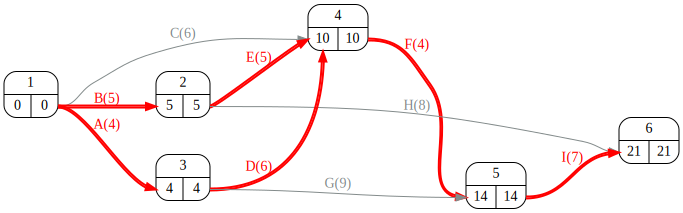

In [13]:
# Pert de duraciones mínimas calculado anteriormente, mostrado nuevamente para comparar
SVG("pert_2024-11-duraciones_minimas.svg")

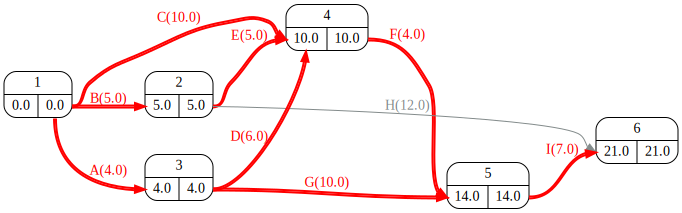

In [14]:
# Proyecto con duraciones reducidas utilizando Ackoff-Sassieni
duracion_ackoff = ackoff.data.loc[14,:]['A':'I'] + datos_enunciado['Dtope']
proyecto.pert(filename="pert_ackoff.svg", durations=duracion_ackoff)

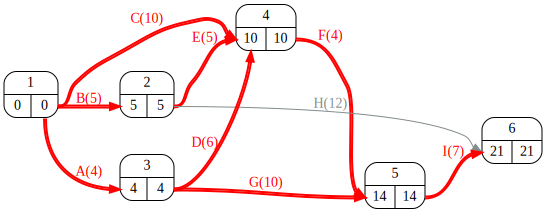

In [15]:
# Proyecto con duraciones reducidas utilizando Programación Lineal. Coincidente en este caso con el obtenido con Ackoff-Sassieni
proyecto.pert(filename="pert_simplex_crashing.svg", durations=solucion['d'])